# SAGE Testing

This tests the implementation of Sparse Additive Generative Model of Text (SAGE) on a small subset of our data.

In [12]:
import sage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons
%matplotlib inline

flatten = lambda l: [item for sublist in l for item in sublist]

In [13]:
ekphrasis_processor = TextPreProcessor(
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user', 'time', 'date', 'number'],  # normalize terms
    fix_html=True,  # fix HTML tokens  
    segmenter="english",  # corpus for word segmentation
    corrector="english",  # corpus for spell correction
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # unpack contractions 
    spell_correct_elong=False,  # spell correction for elongated words
    tokenizer=SocialTokenizer(lowercase=False).tokenize,
    dicts=[emoticons]  # replace emojis with words
)

Reading english - 1grams ...
Reading english - 2grams ...
Reading english - 1grams ...


In [14]:
train = pd.read_csv("/home/dfsnow/rbans/data/main_data_sample.csv", nrows=100000)
hate = pd.read_csv("/home/dfsnow/rbans/data/main_training_sample_hate.csv", nrows=20000)

In [15]:
train_counts = dict(Counter(flatten([(ekphrasis_processor.pre_process_doc(body)) for body in train.body])))
hate_counts = dict(Counter(flatten([(ekphrasis_processor.pre_process_doc(body)) for body in hate.body])))

In [19]:
hate_vocab = [word for word,count in Counter(hate_counts).most_common(3000)]

In [20]:
x_hate = np.array([hate_counts.get(word,0) for word in hate_vocab])
x_base = np.array([train_counts.get(word,0) for word in hate_vocab]) + 1.

In [21]:
mu = np.log(x_base) - np.log(x_base.sum())

In [22]:
eta = sage.estimate(x_hate, mu)

Print words that are especially frequent hate posts compared to baseline

In [24]:
print(sage.topK(eta,hate_vocab,100))

['░', 'Flawed', '▓', 'spez', 'PIZZAGATE', '▒', 'systemFlawed', 'Bigot', 'niggers', 'wew', 'Voat', 'fatties', 'Gamergate', 'GamerGate', 'globalists', 'censors', 'centipede', 'nigger', 'voat', 'pizzagate', 'redacted', 'incel', 'cucks', 'PATRIOT', 'COAT', 'GG', 'lad', 'beef', 'KEK', 'KiA', 'illegals', 'Centipede', 'shitlord', 'MAGA', 'TRP', 'COATS', 'HANDED', 'devious1087', 'BotsByLiam', 'feminists', 'REAL', 'MGTOW', 'Romney', 'TRAIN', 'gamergate', 'SPEED', 'BMI', 'BRAKES', 'Cuck', 'CTR', 'cucked', 'FASTER', 'SOON', 'vaccinated', 'MPH', 'censorship', 'Wu', 'gamers', 'incels', 'Soros', 'BILLION', 'T_D', 'patriarchy', 'Merry', 'pedo', 'The_Donald', 'electors', 'feminist', 'CURRENT', 'THATS', 'cuck', 'Podesta', 'WON', 'globalist', 'RUNNING', 'STEAM', 'Tucker', 'Jews', 'IQ', 'SJW', 'misogyny', 'feminism', 'pedophile', 'coat', 'SJWs', 'Kek', 'Asians', 'the_donald', 'system', 'fatty', 'Chad', 'jew', 'pede', 'admins', 'vaccines', 'MSM', 'Pizzagate', 'accusation', 'gays', 'OUT']


Print words that are especially infrequent in hate posts

In [25]:
print(sage.topK(-eta,hate_vocab,100))

['players', '|', 'season', '%', '^^', 'player', '█', 'de', 'team', 'card', '3', '+', 'performed', '7', 'speed', 'match', '8', '6', 'series', 'moderators', 'app', 'k', 'play', '2', 'playing', '<annoyed>', 'luck', 'PC', 'concerns', '<tong>', 'damage', '<money>', 'played', 'available', 'Thanks', 'bought', 'game', 'compose', 'automatically', '<happy>', 'price', 'characters', '5', '<', 'recommend', 'box', 'thanks', 'submission', '&', 'submit', '0', 'contact', 'slow', 'trade', 'y', 'cheap', 'M', 'search', 'games', 'buying', 'drive', '<time>', 'sell', 'Happy', 'car', '1', 'sold', 'range', 'fun', 'questions', 'track', 'store', 'music', 'skills', 'depends', 'overall', 'flair', 'message', 'expensive', 'add', 'loved', 'base', 'bed', 'author', 'amazing', 'stuck', 'ship', 'weapons', 'build', '<laugh>', 'buy', 'annoying', 'regular', 'boss', 'helps', 'character', 'proper', 'fan', 'city', 'option']


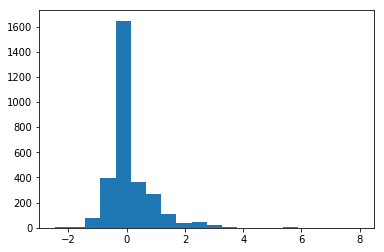

In [26]:
plt.hist(eta,20);

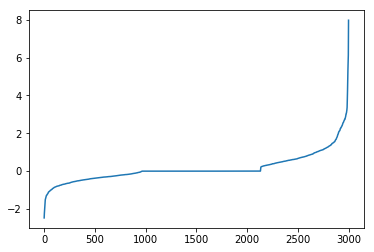

In [27]:
plt.plot(sorted(eta));